In [1]:
from graph_tool.all import *

In [2]:
class Prop(object):
    
    def __init__(self,label=None,pdg=None):
        
        self.label = label
        self.pdg = pdg
    
    def __eq__(self,other):
        return self.pdg == other.pdg
    
    def __cmp__(self,other):
        if self.pdg > other.pdg:
            return 1
        elif self.pdg == other.pdg:
            return 0
        else: return -1
        
    def __hash__(self):
        return self.pdg
    
    def __str__(self):
        return self.label
    
    def __int__(self):  #This is used to compare vertices
        return self.pdg

In [36]:
#Define a simple graph with an object property
top = Graph(directed=True)
top.vertex_properties['Prop'] = top.new_vertex_property("object")
top.vertex_properties['label'] = top.new_vertex_property("string")
top.list_properties()

Prop           (vertex)  (type: python::object)
label          (vertex)  (type: string)


In [37]:
#Create graph:
blob = top.add_vertex()
top.vp.Prop[blob] = Prop('v0',0)
#Create initial states
#and its links to the initial production vertex:
momA = top.add_vertex()
momB = top.add_vertex()
top.vp.Prop[momA] = Prop('~c1+',1000024)
top.vp.Prop[momB] = Prop('~c1-',-1000024)
e = top.add_edge(blob,momA)
e = top.add_edge(blob,momB)
d1 = top.add_vertex()
d2 = top.add_vertex()
top.vp.Prop[d1] = Prop('W+',13)
top.vp.Prop[d2] = Prop('~n10',1000022)
e = top.add_edge_list([[momA,d1],[momA,d2]])
d11 = top.add_vertex()
d12 = top.add_vertex()
top.vp.Prop[d11] = Prop('e+',-11)
top.vp.Prop[d12] = Prop('nue',10)
e = top.add_edge_list([[d1,d11],[d1,d12]])

d1 = top.add_vertex()
d2 = top.add_vertex()
top.vp.Prop[d1] = Prop('~n10',1000022)
top.vp.Prop[d2] = Prop('W-',-13)
e = top.add_edge_list([[momB,d1],[momB,d2]])
d21 = top.add_vertex()
d22 = top.add_vertex()
top.vp.Prop[d21] = Prop('e-',-11)
top.vp.Prop[d22] = Prop('nue',10)
e = top.add_edge_list([[d2,d21],[d2,d22]])
for v in top.vertices():
    top.vp.label[v] = top.vp.Prop[v].label

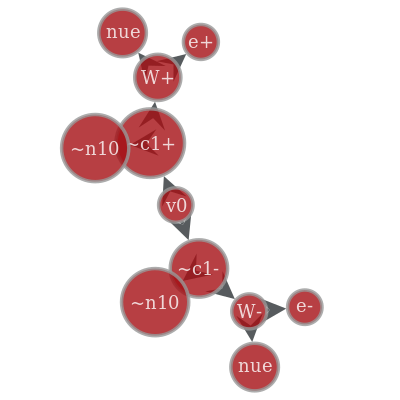

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f6a06795fd0, at 0x7f6a0659f650>

In [38]:
graph_draw(top,vertex_text = top.vp.label, vertex_font_size=18, inline=True, output_size=(400,400))

In [18]:
#Create a second graph with switched branches:
topB = Graph(directed=True)
topB.vertex_properties['Prop'] = topB.new_vertex_property("object")
topB.vertex_properties['label'] = topB.new_vertex_property("string")
blob = topB.add_vertex()
topB.vp.Prop[blob] = Prop('v0',0)
#Create initial states
#and its links to the initial production vertex:
momA = topB.add_vertex()
momB = topB.add_vertex()
topB.vp.Prop[momA] = Prop('~n20',1000023)
topB.vp.Prop[momB] = Prop('~c1+',1000024)
e = topB.add_edge_list([[blob,momA],[blob,momB]])
d1 = topB.add_vertex()
d2 = topB.add_vertex()
topB.vp.Prop[d1] = Prop('W+',13)
topB.vp.Prop[d2] = Prop('~n10',1000022)
e = topB.add_edge_list([[momB,d1],[momB,d2]])
d1 = topB.add_vertex()
# d2 = topB.add_vertex()
topB.vp.Prop[d1] = Prop('nu',11)
# topB.vp.Prop[d2] = Prop('~n10',1000022)
e = topB.add_edge_list([[momA,d1]])
for v in topB.vertices():
    topB.vp.label[v] = topB.vp.Prop[v].label

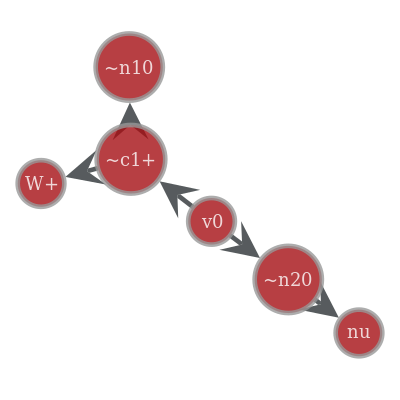

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f6a065b20d0, at 0x7f6a0659f850>

In [19]:
graph_draw(topB,vertex_text = topB.vp.label, vertex_font_size=18, inline=True, output_size=(400,400))

In [20]:
#Check overall shape isomorphism
print isomorphism(top,topB)
#Check isomorphism including Prop equality:
print isomorphism(top,topB,vertex_inv1=top.vp.Prop,vertex_inv2=topB.vp.Prop)

False
False


In [21]:
is_iso, iso_map = isomorphism(top,topB,vertex_inv1=top.vp.Prop,vertex_inv2=topB.vp.Prop,isomap=True)

In [23]:
for v in top.vertices():
    print top.vp.Prop[v],'=',topB.vp.Prop[iso_map[v]]

v0 = v0
~c1+ = v0
~n20 = v0
W+ = v0
~n10 = v0
~n10 = v0
nu = v0


In [26]:
int('1')

1